<a href="https://colab.research.google.com/github/astrasourav/Deep-Learning-/blob/master/Rock_Paper_Scissors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Importing libraries

import tensorflow as tf
from tensorflow import keras

Handeling dataset and Preprocessing the data before feeding into the CNN

In [2]:
# Downloading the dataset

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
    -O /tmp/rps.zip
  
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
    -O /tmp/rps-test-set.zip

--2020-06-06 18:43:12--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.204.128, 2404:6800:4008:c06::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M  59.8MB/s    in 3.2s    

2020-06-06 18:43:16 (59.8 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]

--2020-06-06 18:43:17--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.23.128, 2404:6800:4008:c04::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.23.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘/tmp/rps-test-set.zip’

/tmp/rp

In [0]:
# Unzipping the data

import os
import zipfile

zip_dir = '/tmp/rps.zip'
zip_file = zipfile.ZipFile(zip_dir, 'r')
zip_file.extractall('/tmp')
zip_file.close()

zip_dir = '/tmp/rps-test-set.zip'
zip_file = zipfile.ZipFile(zip_dir, 'r')
zip_file.extractall('/tmp/')
zip_file.close()

In [4]:
# Preprocessing the data and doing image augmentation to avoid overfitting

from keras.preprocessing.image import ImageDataGenerator

bs = 100 
train_dir = '/tmp/rps'
train_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest'
)

test_dir = '/tmp/rps-test-set'
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
      train_dir,
      target_size=(150, 150),
      class_mode='categorical',
      batch_size=bs
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    class_mode = 'categorical',
    batch_size = bs
)

Using TensorFlow backend.


Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


Creating the model

In [5]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(64, (3,3), input_shape=(150, 150, 3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D((2,2), strides=2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D((2,2), strides=2),
                                    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D((2,2), strides=2),
                                    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D((2,2), strides=2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dense(3, activation='softmax'),
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [6]:
# Compiling and Training the model

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']),

history = model.fit(train_generator, epochs=25, steps_per_epoch=2520/bs, validation_data=test_generator, validation_steps=372/bs, verbose=1)

Epoch 1/25
26/25 [==============================] - 24s 912ms/step - loss: 1.1166 - accuracy: 0.3655 - val_loss: 1.0485 - val_accuracy: 0.5269
Epoch 2/25
26/25 [==============================] - 24s 906ms/step - loss: 1.0142 - accuracy: 0.4944 - val_loss: 0.6214 - val_accuracy: 0.7984
Epoch 3/25
26/25 [==============================] - 23s 895ms/step - loss: 0.7570 - accuracy: 0.6516 - val_loss: 0.4018 - val_accuracy: 0.8737
Epoch 4/25
26/25 [==============================] - 23s 893ms/step - loss: 0.5433 - accuracy: 0.7813 - val_loss: 0.3257 - val_accuracy: 0.7984
Epoch 5/25
26/25 [==============================] - 24s 922ms/step - loss: 0.4313 - accuracy: 0.8190 - val_loss: 0.1287 - val_accuracy: 0.9704
Epoch 6/25
26/25 [==============================] - 23s 897ms/step - loss: 0.2732 - accuracy: 0.9032 - val_loss: 0.1082 - val_accuracy: 0.9597
Epoch 7/25
26/25 [==============================] - 23s 895ms/step - loss: 0.2061 - accuracy: 0.9274 - val_loss: 0.1552 - val_accuracy: 0.9194

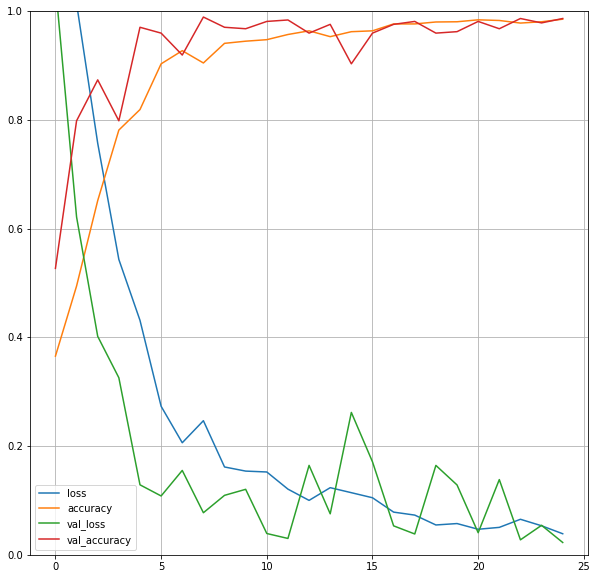

In [8]:
# Plotting the chart of our model

import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(10, 10))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [0]:
# Predicting the image

import numpy as np
from keras.preprocessing import image

test_img = image.load_img('', target_size=(150, 150))
# test_img = image.load_img('/content/39641855.jpg', target_size=(150, 150))
test_img = image.img_to_array(test_img)
test_img = np.expand_dims(test_img, axis=0)
# test_img.shape

result = model.predict(test_img)
print(result)

In [10]:
test_generator.class_indices

{'paper': 0, 'rock': 1, 'scissors': 2}